<a href="https://colab.research.google.com/github/AngelGParra/Integraci-n-y-prospecci-n/blob/main/1_Caracterizaci%C3%B3n_VA_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caracterización Experimental de Variables**

0.Cargar librerías d trabajo






In [1]:
import numpy as np                    #funciones numéricas (coseno, raíz cuadrada...)
import matplotlib.pyplot as plt
import pandas as pd                   #Comunicación con el Excel
import seaborn as sns                 #Librería para la gráfica de distribuciones

#Para carga automática de los datos
from google.colab import drive        #Cargar datos desde el drive de manra automática
drive.mount('/content/drive')         #Conecta el drive al colab

Mounted at /content/drive


1.Se procede con la carga de los datos

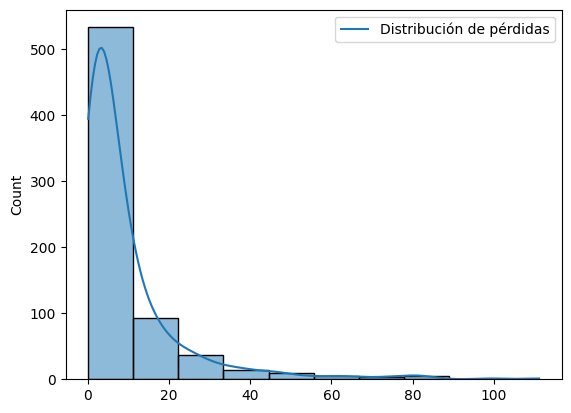

In [3]:
nxl= '/content/drive/MyDrive/Octavo semestre/Integración de Datos y Prospección/Semana 3 /3. FallasTecnologicas en clase.xlsx'
XDB=pd.read_excel(nxl)
XDB.dropna
XDB.head(10) #mostrar los primeros 100 datos
#Tomamos las cariables de interés
Xev= XDB.iloc[:,3] #Variable eventos semanales
Xsev=XDB.iloc[:,4] #Pérdidas promedio por evento
LDA=np.multiply(Xev,Xsev) #Loss Distribution...

#Graficamos la distribución de las pérdidas
plt.figure()
sns.histplot(LDA,kde=True,bins=10)
#bins: agrupar los datos en 10 intervalos
plt.legend(['Distribución de pérdidas'])
plt.show()

2.Caracterización de la distribución de las pérdidas

In [4]:
counts,bin_edges=np.histogram(LDA,bins=10)
print("Los datos por intervalos son:\n",counts) #Cuantos datos hay por intervalo
print("Los límites de los intervalos son:\n",bin_edges) #Limites por intervalo

#1. Los valores centrales - marcas de clase
mc=(bin_edges[:-1]+bin_edges[1:])/2
#Límites inferiores bin_edges[-1:]
#Límites superiores bin_edges[1:]
print("Los valores centrales de las clases son:\n",mc)

#Cuantos datos hay por intervalo
fp=counts/sum(counts)
print("Los datos por intervalo son:\n",fp)

#2. Se procede con el calculo de las medidas de tendencia central
#Media, Varianza, Coeficiente de asimetría, Kurtosis
u=np.sum(np.multiply(mc,fp))
print("La media de los datos es:",u)

#3. Desviación-estándar (varianza)
var=np.sum(np.multiply((mc-u)**2,fp)) #Suma producto del Excel
print("La varianza de los datos es:",var)
std=np.sqrt(var)
print("La desviación estándar de los datos es:", std)

#4. Coeficiente de asimetría
cas=np.sum(np.multiply(((mc-u)/std)**3,fp))
print("El coeficiente de asimetría de los datos es:",cas)

#5 Coeficiente de kurtosis
ck=np.sum(np.multiply(((mc-u)/std)**4,fp))
ck=ck-3
print("El coeficiente de kurtosis de los datos es:",ck)


Los datos por intervalos son:
 [533  93  37  14   9   5   3   5   1   1]
Los límites de los intervalos son:
 [  0.1423   11.23637  22.33044  33.42451  44.51858  55.61265  66.70672
  77.80079  88.89486  99.98893 111.083  ]
Los valores centrales de las clases son:
 [  5.689335  16.783405  27.877475  38.971545  50.065615  61.159685
  72.253755  83.347825  94.441895 105.535965]
Los datos por intervalo son:
 [0.76034237 0.13266762 0.05278174 0.01997147 0.0128388  0.00713267
 0.0042796  0.00713267 0.00142653 0.00142653]
La media de los datos es: 11.07019634094151
La varianza de los datos es: 170.14888945066892
La desviación estándar de los datos es: 13.044113210589247
El coeficiente de asimetría de los datos es: 3.58241551867726
El coeficiente de kurtosis de los datos es: 15.266617247076208


**Analisis de los resultados **
En la base de datos se cuenta con un total de 701 registros de eventos de pérdida aspciados con las operaciones a rtaves de canales electronicos de una FINTECH. Estos registros nos arrojan como resultado una confiabilidad en la estimacion de los estadisticos del 99% de acuerdo con la teoria de los percentiles. En la grafica anataerior podemos observar que la distribucion presenta estrictira de cola larga, esto es promovido por un coeficinete de asimetria positivo aproximadamente de 3.348, y un coeficiente de kurtosis aproximadamente de 15 unidades, lo que indica que la mayoría de los datos se encuentran muy concentraods alrededor de la media, en un 76% aproximadamente, Esta estructura muestra claramente que los eventos de pérdida extremos son muy escasos, lo que indica una baja exposición al riesgo.

**CLASE 4 11/02**


3. Se procede con el muestreo de la variable aleatoria de pérdidas

El coeficiente de asimetría de los datos es [3.20155111]
El coeficiente de kurtosis de los datos es [8.88007799]
La variación del coeficiente de asimetría es [0.10631497]
La variación del coeficiente de kurtosis es [0.41833362]


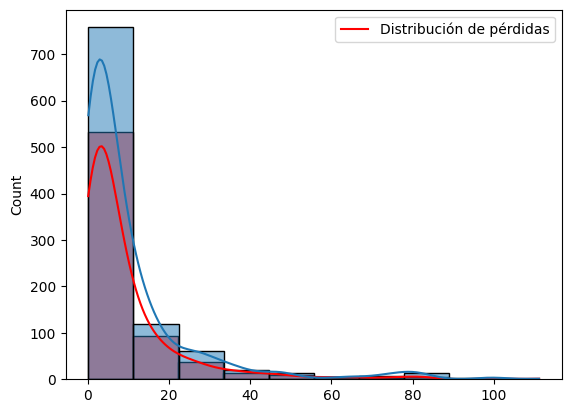

In [9]:
from scipy.stats import skew, kurtosis
#0. Preparar la variable para el muestreo
LDAdf=pd.DataFrame(LDA)

#1. Se procede con el muestreo
LDAs=LDAdf.sample(n=1000,replace=True)
casd=skew(LDAs)
print("El coeficiente de asimetría de los datos es", casd)

ckd=kurtosis(LDAs)
ckd=ckd-3 #el -3 es exceso de kurtosis, siempre es 3 y se utiliza para que la kurtosis te dé bien
print("El coeficiente de kurtosis de los datos es", ckd)

pvcas=(cas-casd)/cas  #variación de coeficiente de asimetría
print("La variación del coeficiente de asimetría es", pvcas)

pvk=(ck-ckd)/ck  #variación de coeficiente de kurtosis
print("La variación del coeficiente de kurtosis es", pvk)

#Se procede con la gráfica de las pérdidas
plt.figure
sns.histplot(LDA,kde=True,bins=10, color='red')
sns.histplot(LDAs,kde=True,bins=10, color='blue')
plt.legend(['Diferencia entre distribuciones de pérdidas'])
plt.show()


4. Mapeo de la dsitribución de probabilidad

In [27]:
if abs(cas)<0.5 and abs(ck)<0.5:
  print("Posible disrtribución normal")

elif cas>0 and ck>3:
  if ck>=8:
   print("Posible distribución exponencial")
  elif ck>=6:
    print("Posible distribución gamma")
  else:
      print("Posible distribución weibull")

   elif ck<3:
print("Posible distribución uniforme")
   else:
      print("No se pudo identificar la distribución")




IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

**Analisis de resutlados**
El numero de datos disponibles para este analisis fueron en total 70q datos lo que lo ubica en una confiabilidad del 99%. Para incrementar esta confiabilidad se procedio con un muestreo basado en el metodo de montecarlo (giro de la ruleta-cargada) logrando en muchos casos coeficientes de curtosis y coeficeintes de asimetría por debajo del 5% y coeficiente de curtosis del 15%, a diferencia del método sampling que utiliza la librería pandas los cuales tuvieron variaciones mayores a estos porcentajes. El metodo de montecarlo asegura variaciones mucho más bajas en estos coeficientes.

